# Exercise 5

Problem 1 : Predicting CentralAir using SalePrice

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.

Import the complete dataset “train.csv” in Jupyter, as houseData = pd.read_csv('train.csv')

a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N.

Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship.

You may also want to check the mutual relationship by plotting the two variables using a swarmplot.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


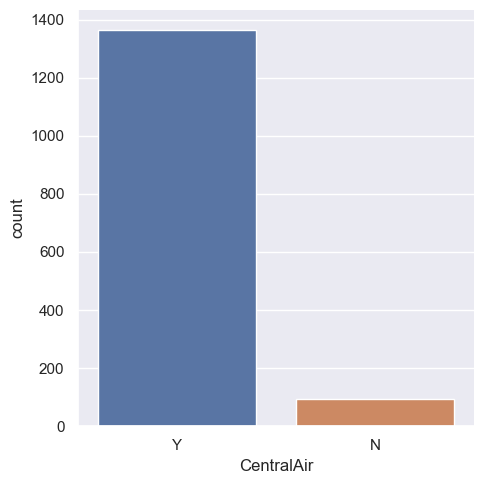

In [3]:
# Count Plot for CentralAir Train
sb.catplot(x = "CentralAir", data = houseData, kind = "count")

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

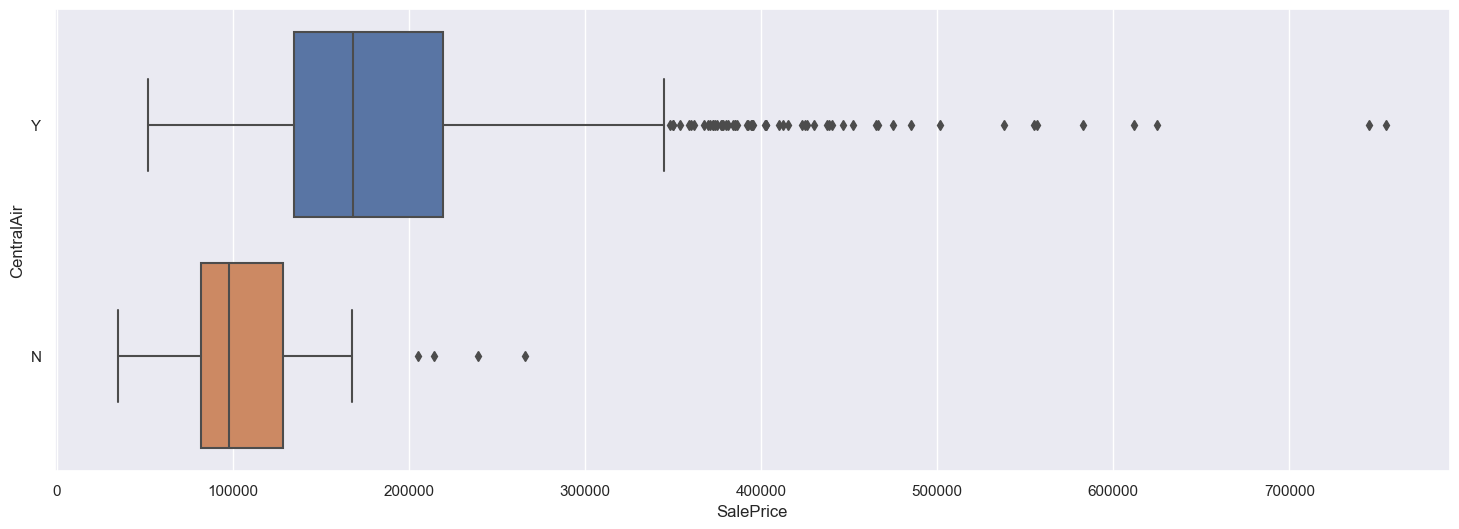

In [4]:
# Joint Boxplot of CentralAir against SalePrice
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")

<Axes: xlabel='SalePrice', ylabel='CentralAir'>

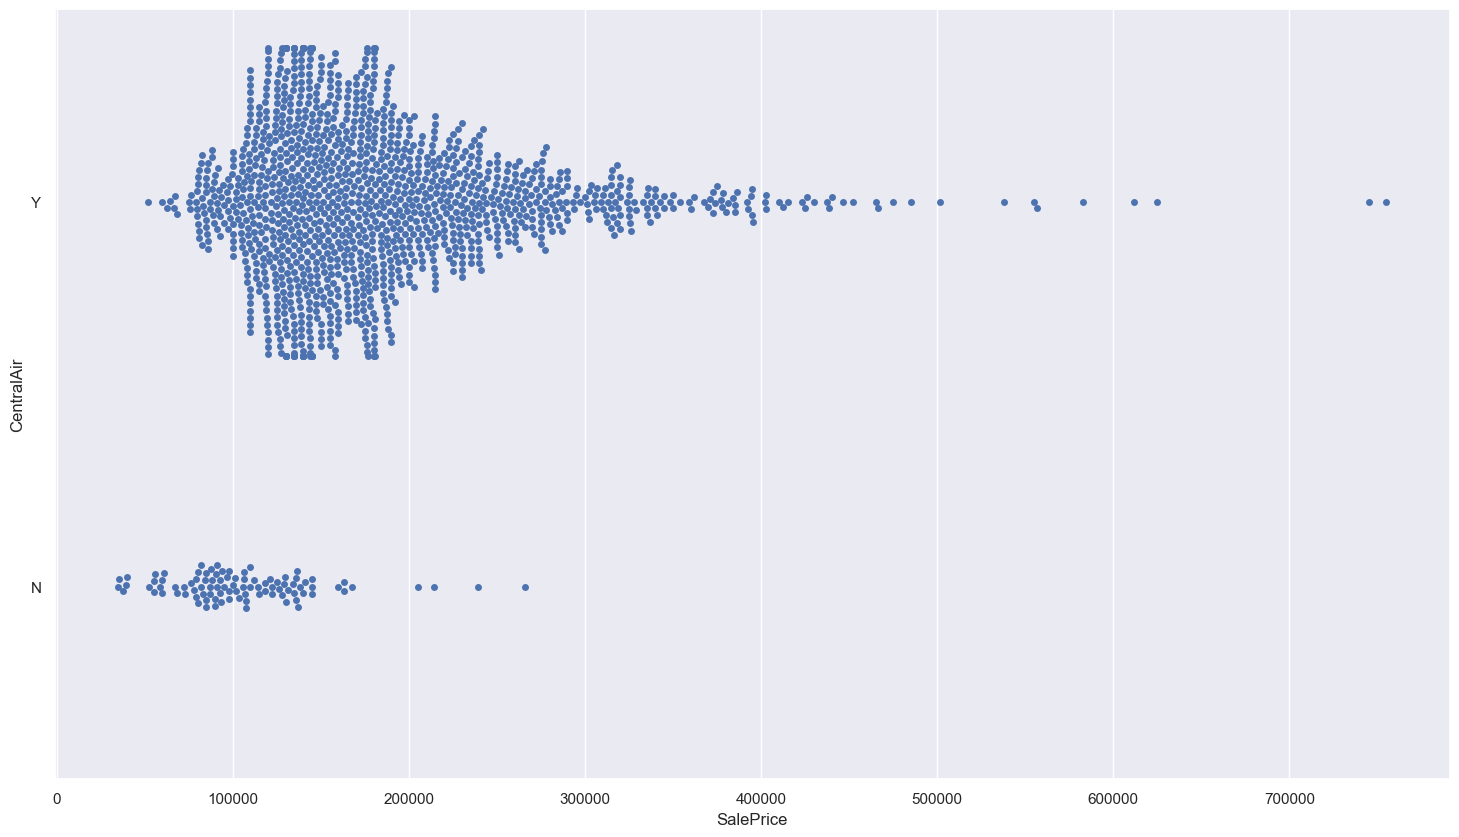

In [5]:
# Joint Swarmplot of CentralAir against SalePrice
f = plt.figure(figsize=(18, 10))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h")

b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [6]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).

d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.
    
y_train = pd.DataFrame(houseData_train['CentralAir'])

X_train = pd.DataFrame(houseData_train['SalePrice'])


In [7]:
houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

# Split the dataset into Train and Test       
#y_train = pd.DataFrame(houseCentralAir[:1100])
#y_test  = pd.DataFrame(houseCentralAir[-360:])
#X_train = pd.DataFrame(houseSalePrice[:1100])
#X_test  = pd.DataFrame(houseSalePrice[-360:])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseSalePrice, houseCentralAir, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


e) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).

In [8]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [9]:
# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

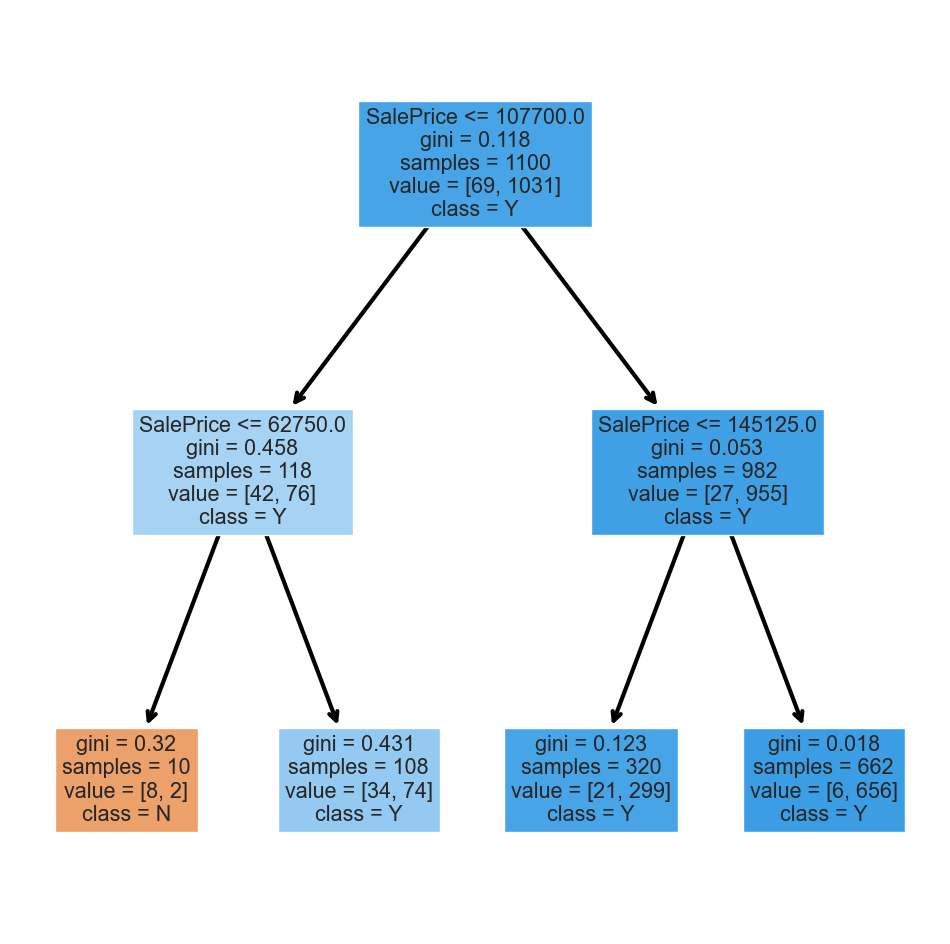

In [10]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

f) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.


Classification Accuracy 	: 0.9427272727272727


<Axes: >

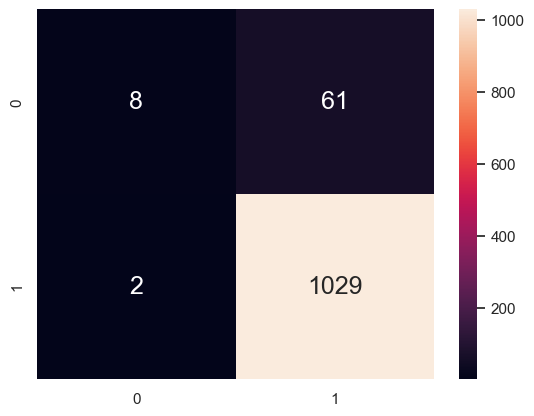

In [11]:
# Predict CentralAir corresponding to SalePrice Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9388888888888889


<Axes: >

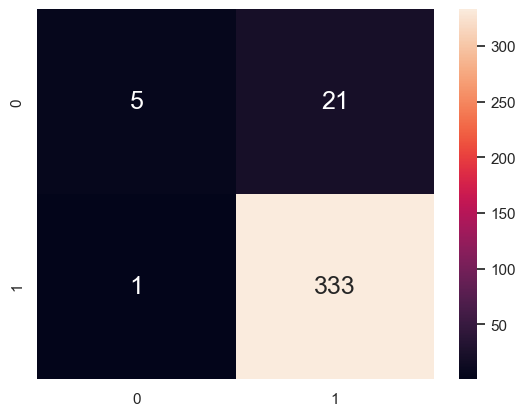

In [12]:
# Predict CentralAir corresponding to SalePrice Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

g) Discuss with your Friends all the accuracy parameters of the decision tree model, including its Classification
Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate.

Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'

one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification

Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.

# Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'

one-by-one to obtain individual Decision Trees. Discuss with your Friends about the models, compare the Classification 

Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'

# 'CentralAir' against 'GrLivArea'

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


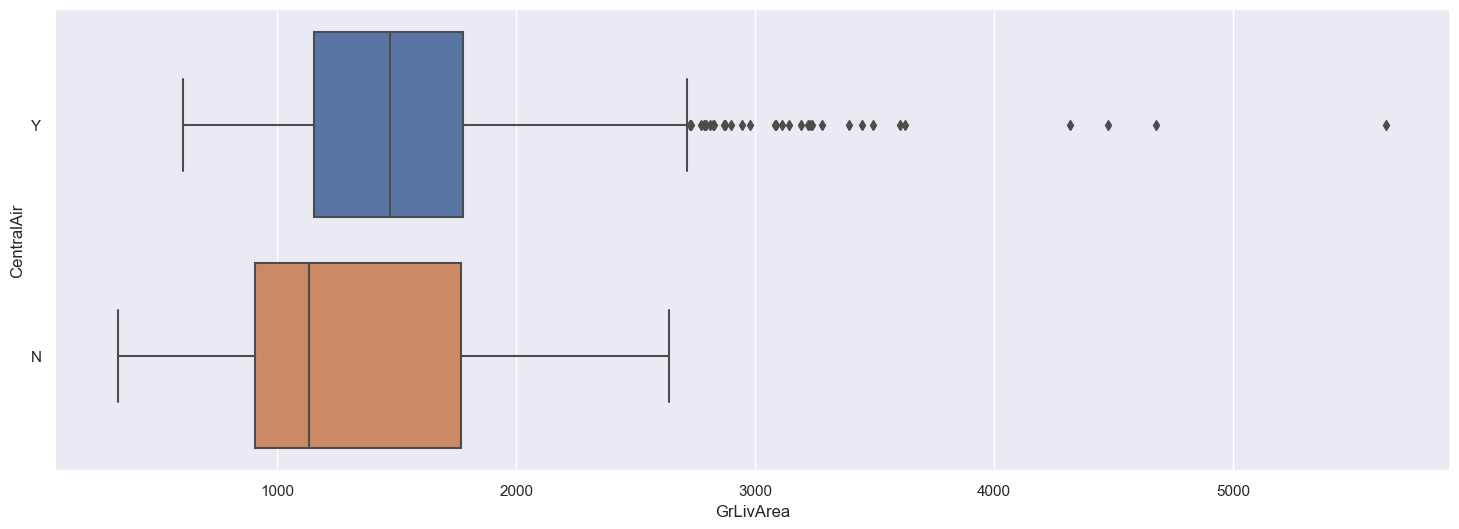

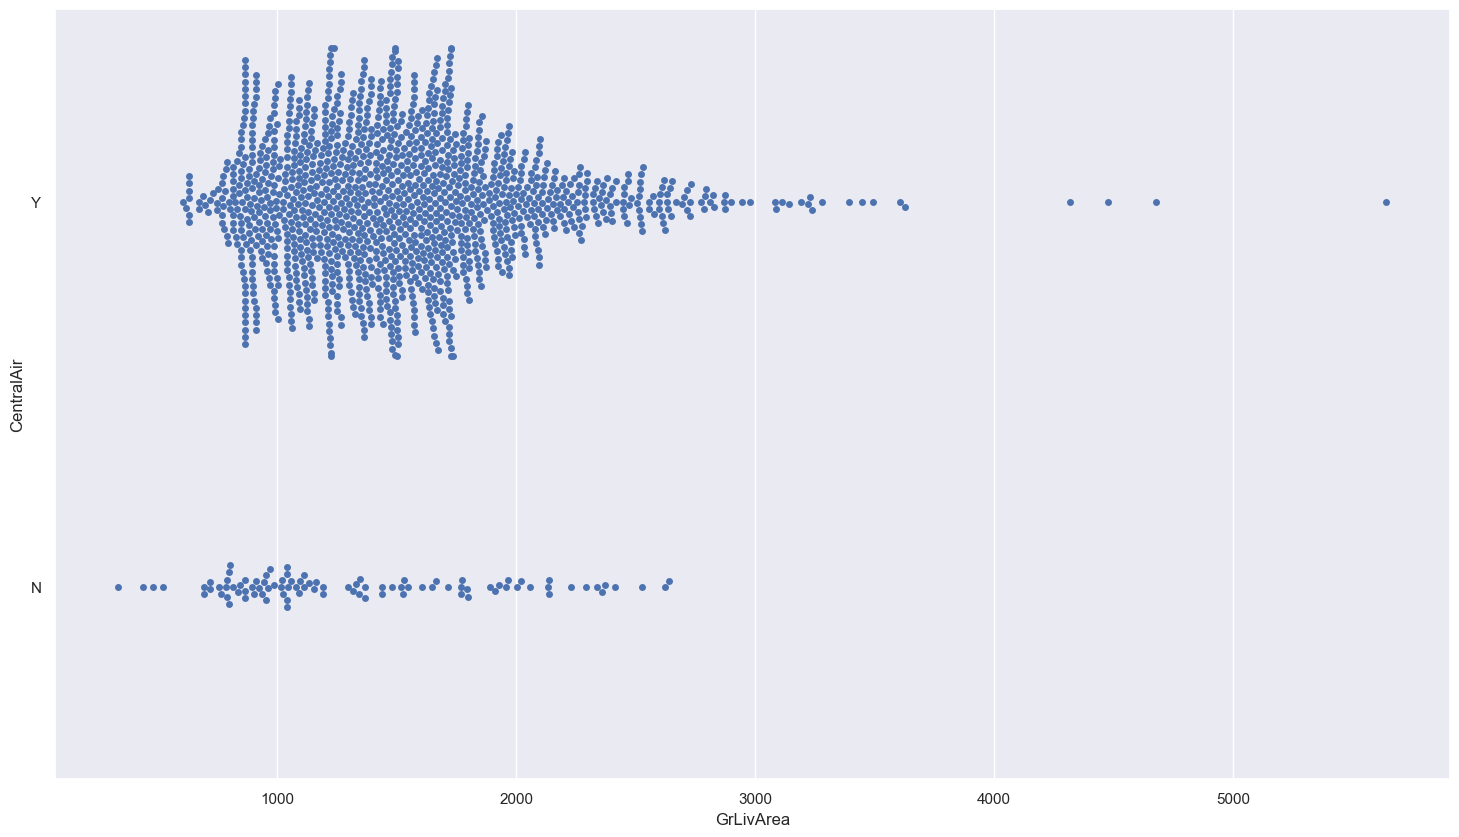

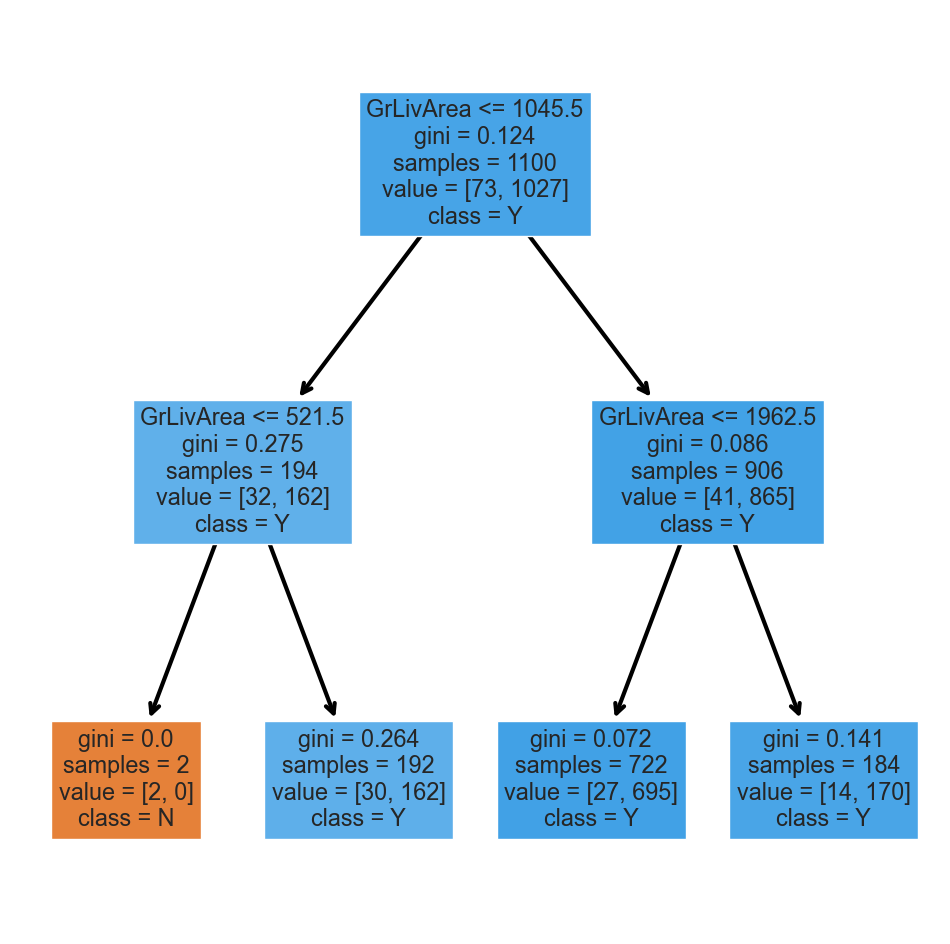

In [13]:
# Joint Boxplot of CentralAir against GrLivArea
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = houseData, orient = "h")

# Joint Swarmplot of CentralAir against GrLivArea
f = plt.figure(figsize=(18, 10))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = houseData, orient = "h")


houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])

# Split the dataset into Train and Test       
#y_train = pd.DataFrame(houseCentralAir[:1100])
#y_test  = pd.DataFrame(houseCentralAir[-360:])
#X_train = pd.DataFrame(houseGrLivArea[:1100])
#X_test  = pd.DataFrame(houseGrLivArea[-360:])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseGrLivArea, houseCentralAir, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9354545454545454


<Axes: >

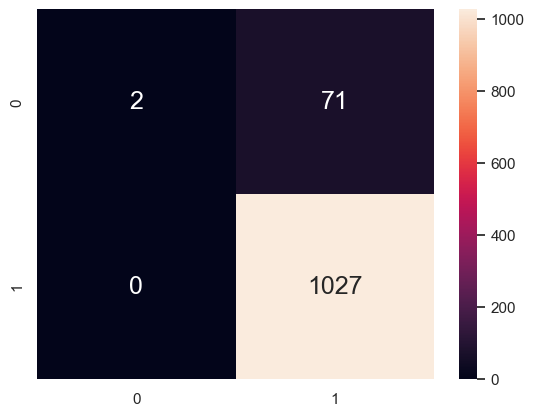

In [14]:
# Predict CentralAir corresponding to GrLiveArea Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9444444444444444


<Axes: >

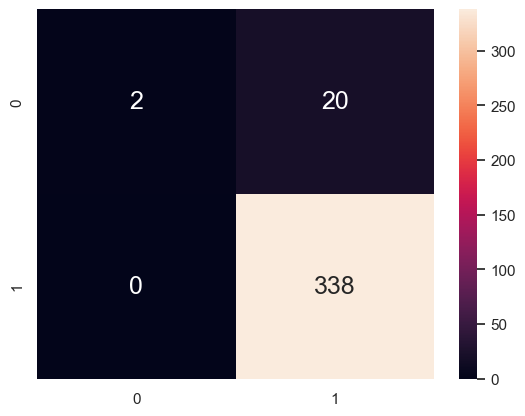

In [15]:
# Predict CentralAir corresponding to GrLiveArea Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# 'CentralAir' against 'LotArea'

C:\Users\Nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


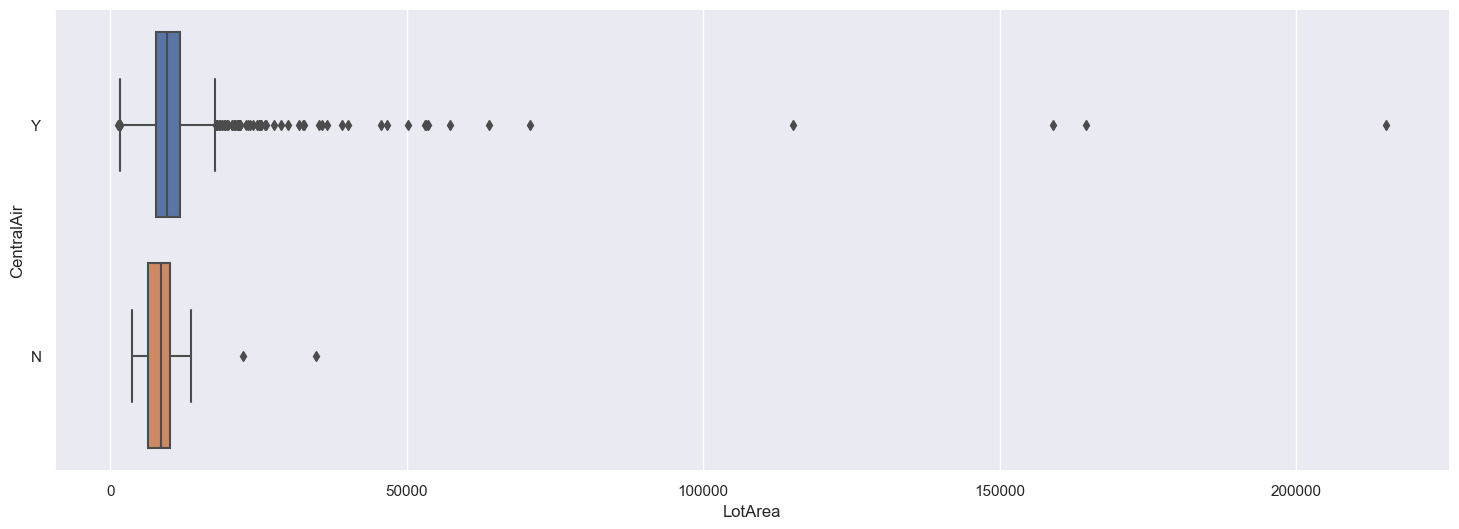

C:\Users\Nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


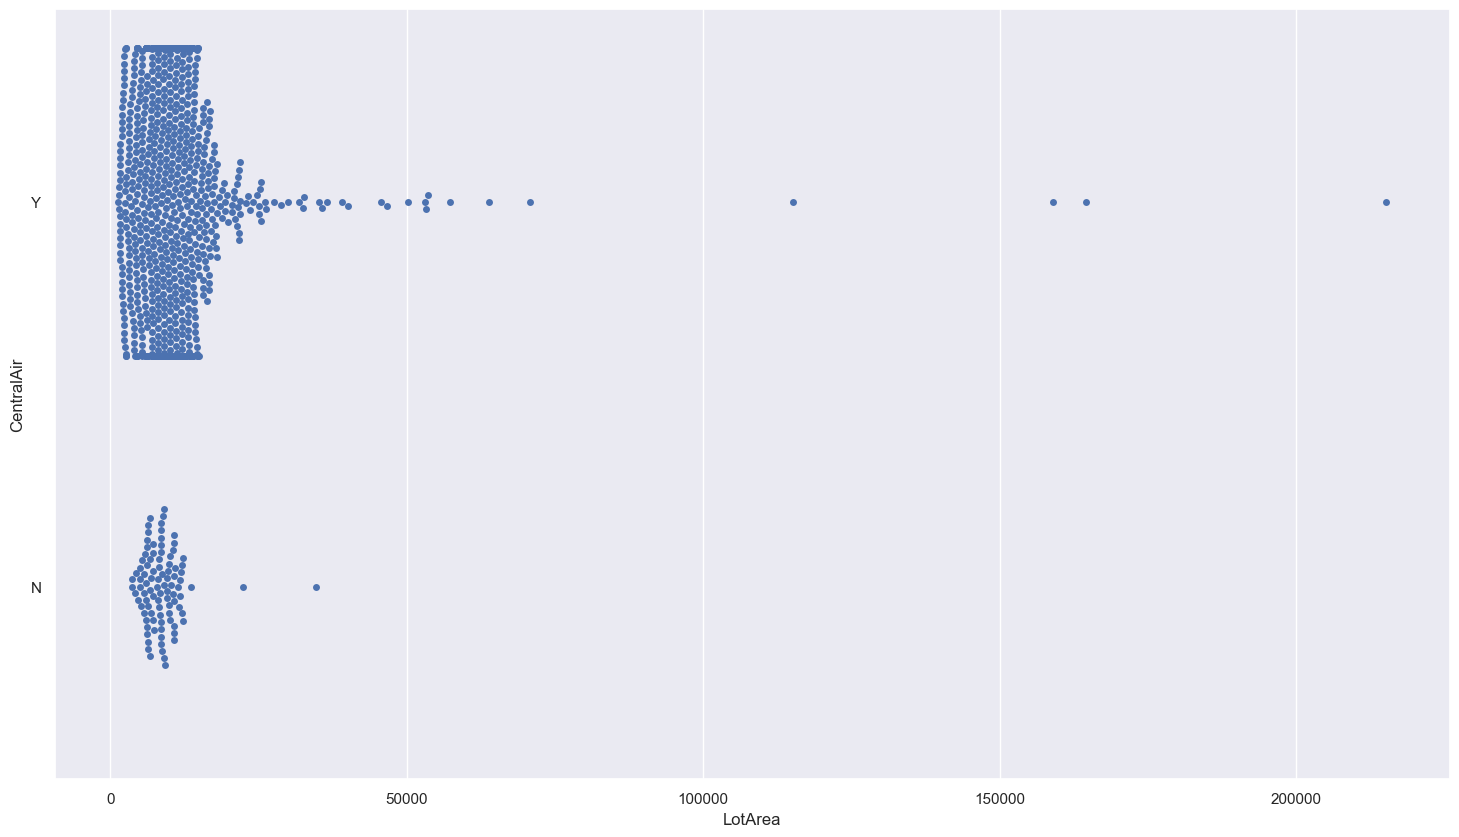

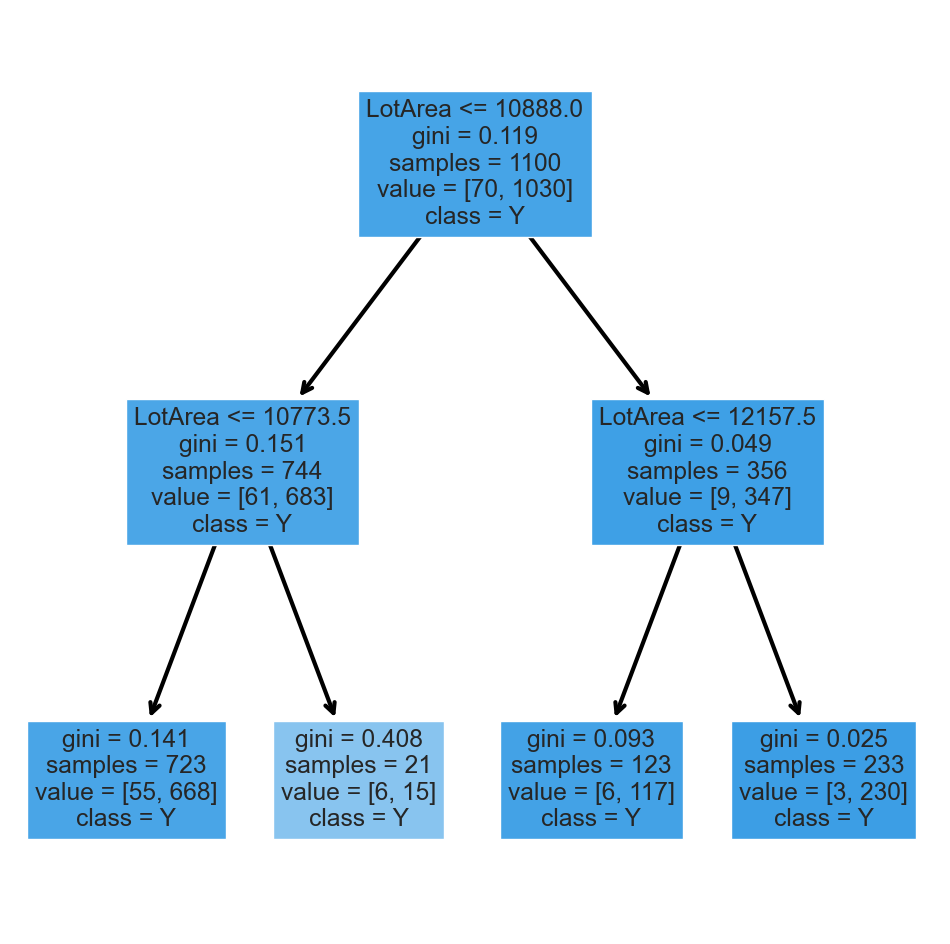

In [16]:
# Joint Boxplot of CentralAir against LotArea
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "LotArea", y = "CentralAir", data = houseData, orient = "h")

# Joint Swarmplot of CentralAir against GrLivArea
f = plt.figure(figsize=(18, 10))
sb.swarmplot(x = "LotArea", y = "CentralAir", data = houseData, orient = "h")


houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseLotArea = pd.DataFrame(houseData['LotArea'])

# Split the dataset into Train and Test       
#y_train = pd.DataFrame(houseCentralAir[:1100])
#y_test  = pd.DataFrame(houseCentralAir[-360:])
#X_train = pd.DataFrame(houseLotArea[:1100])
#X_test  = pd.DataFrame(houseLotArea[-360:])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseLotArea, houseCentralAir, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9363636363636364


<Axes: >

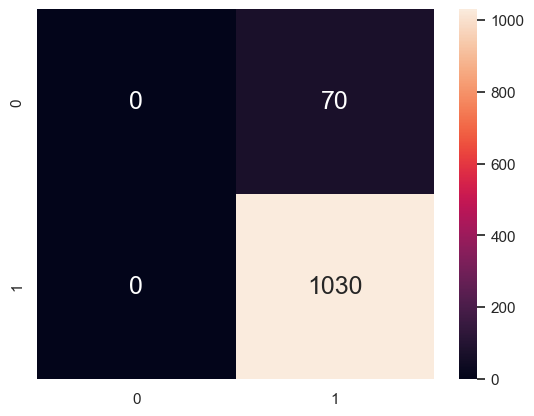

In [17]:
# Predict CentralAir corresponding to LotArea Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9305555555555556


<Axes: >

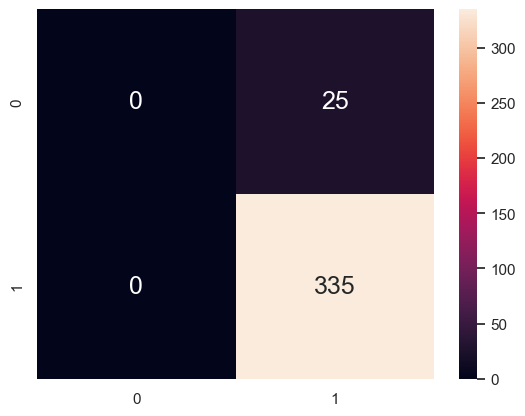

In [18]:
# Predict CentralAir corresponding to LotArea Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# 'CentralAir' against 'TotalBsmtSF'

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


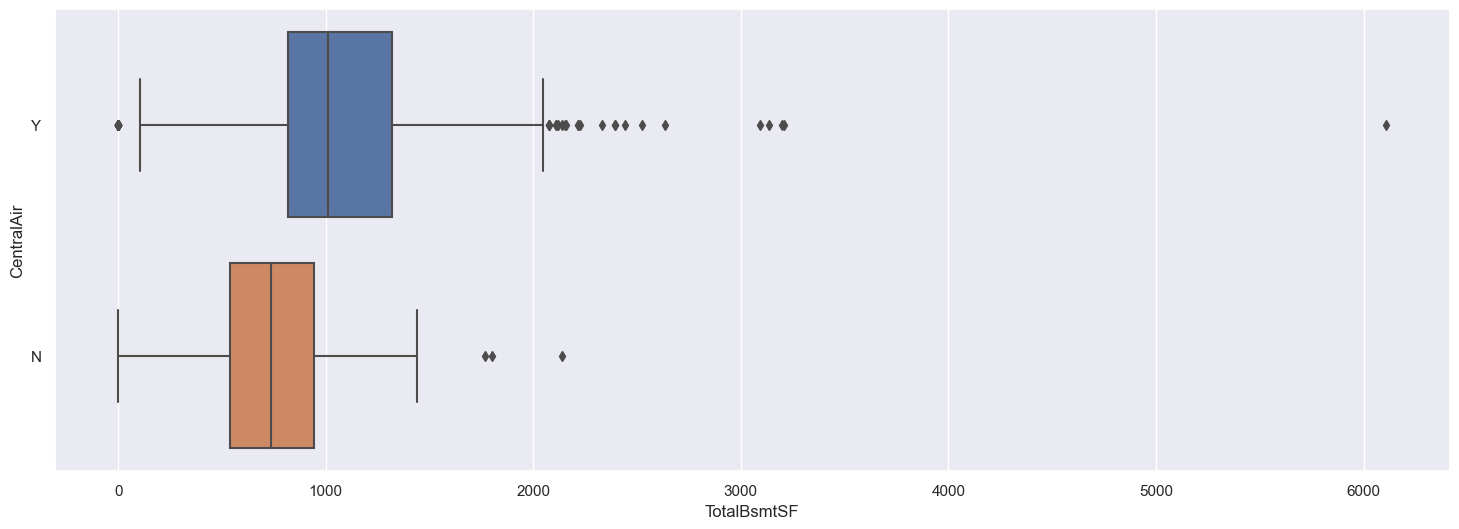

C:\Users\Nicho\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


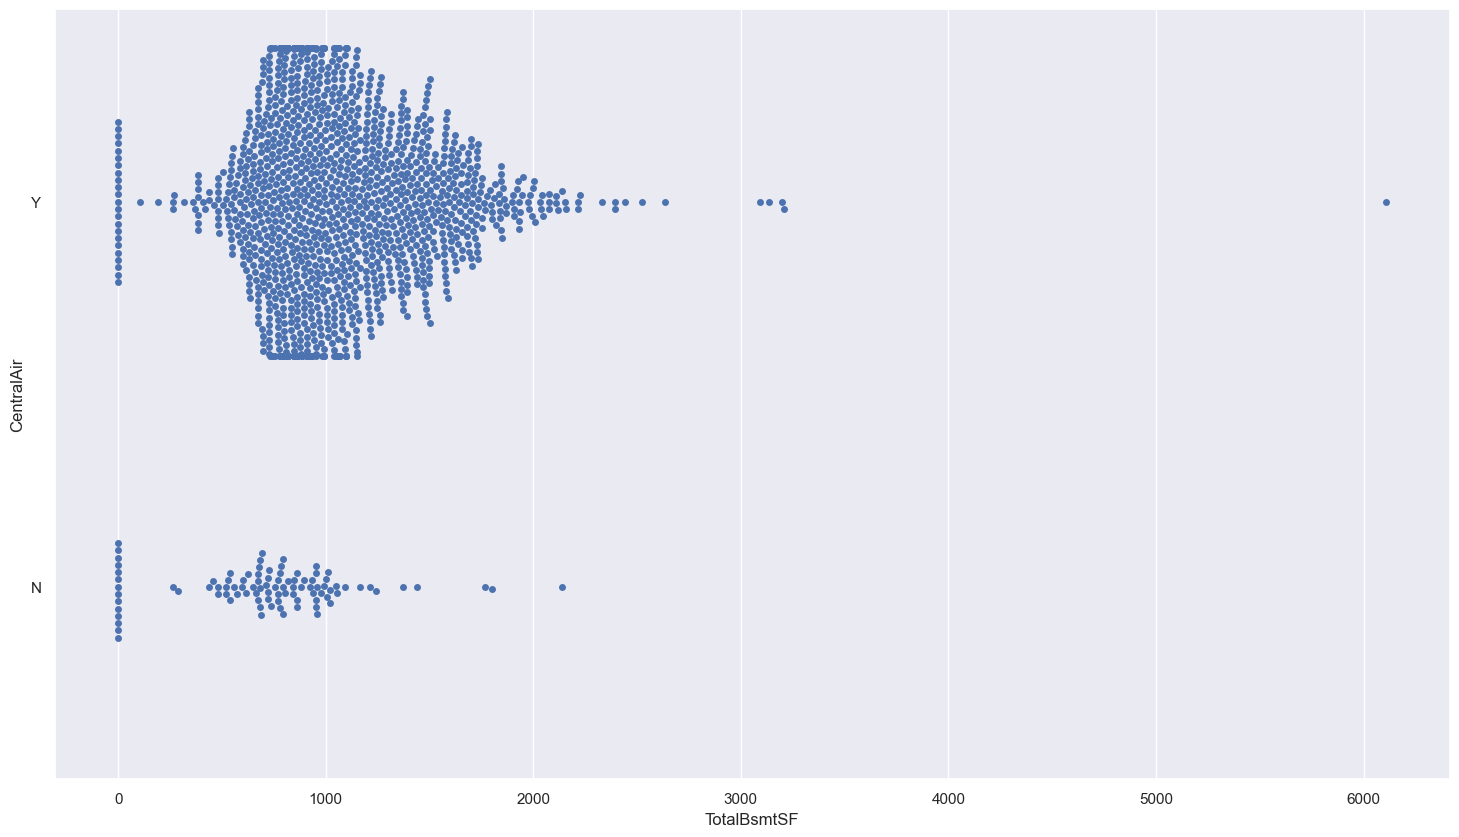

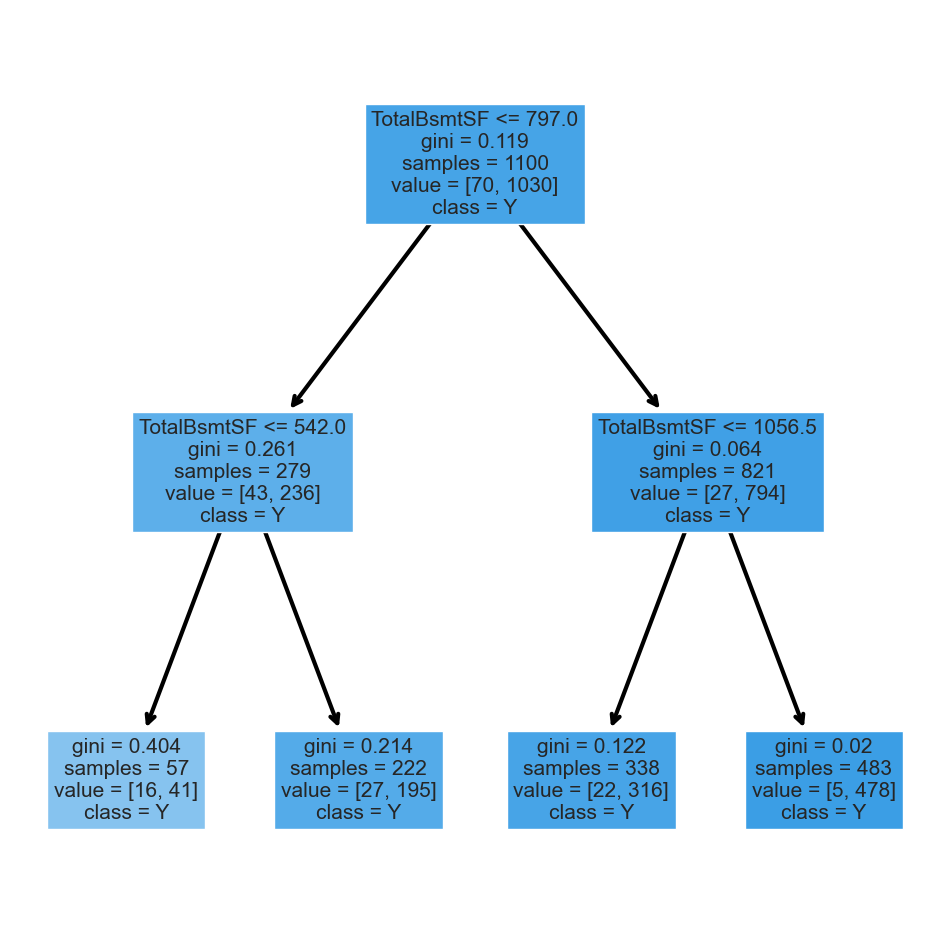

In [19]:
# Joint Boxplot of CentralAir against TotalBsmtSF
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "TotalBsmtSF", y = "CentralAir", data = houseData, orient = "h")

# Joint Swarmplot of CentralAir against TotalBsmtSF
f = plt.figure(figsize=(18, 10))
sb.swarmplot(x = "TotalBsmtSF", y = "CentralAir", data = houseData, orient = "h")


houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseTotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])

# Split the dataset into Train and Test       
#y_train = pd.DataFrame(houseCentralAir[:1100])
#y_test  = pd.DataFrame(houseCentralAir[-360:])
#X_train = pd.DataFrame(houseTotalBsmtSF[:1100])
#X_test  = pd.DataFrame(houseTotalBsmtSF[-360:])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseTotalBsmtSF, houseCentralAir, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Classification Accuracy 	: 0.9363636363636364


<Axes: >

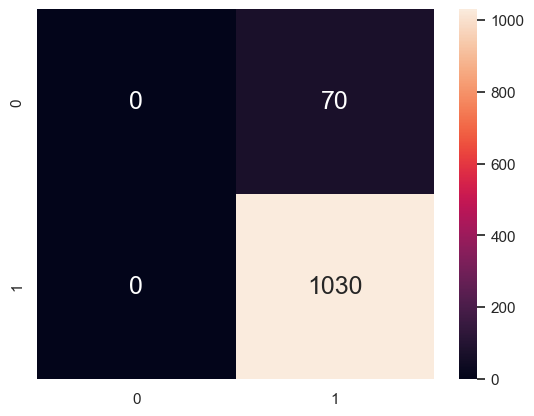

In [20]:
# Predict CentralAir corresponding to TotalBsmtSF Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy 	: 0.9305555555555556


<Axes: >

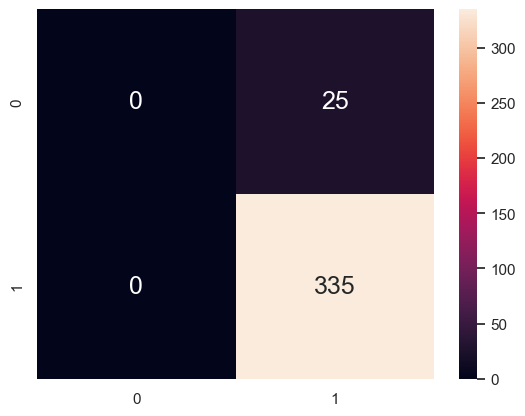

In [21]:
# Predict CentralAir corresponding to TotalBsmtSF Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Train Set : (1100, 1) (1100, 3)
Test Set  : (360, 1) (360, 3)


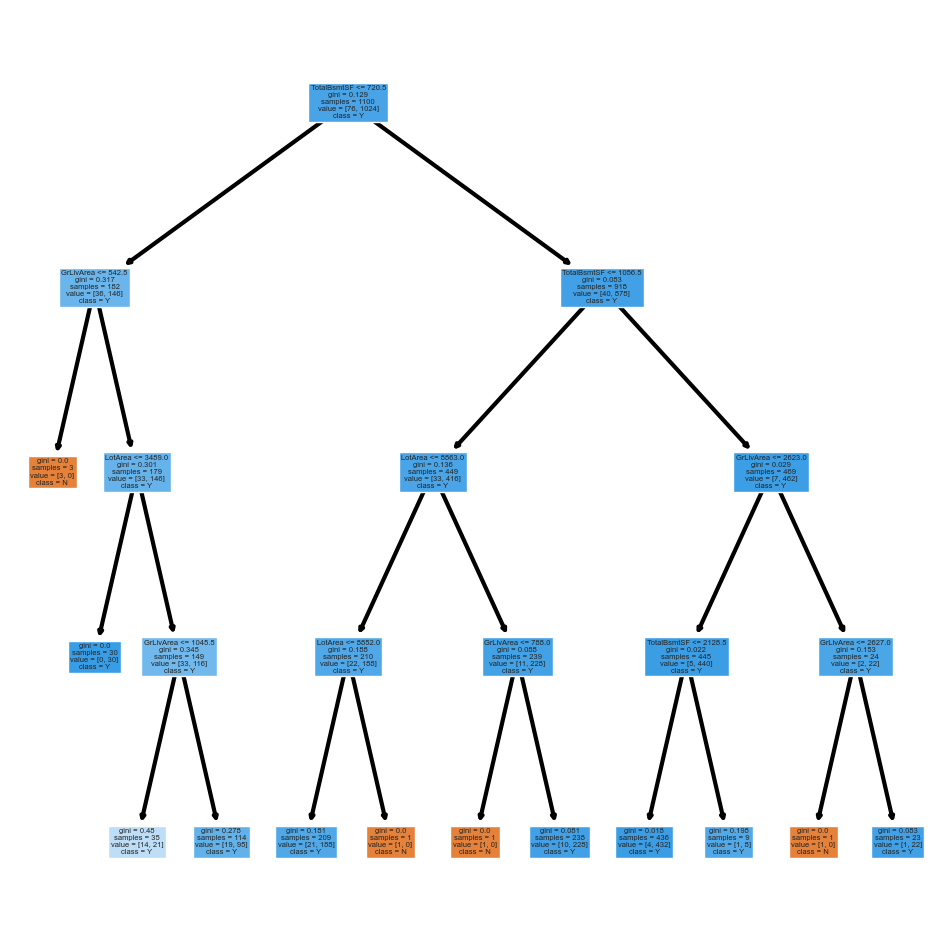

Classification Accuracy 	: 0.95
Classification Accuracy 	: 0.9363636363636364


<Axes: >

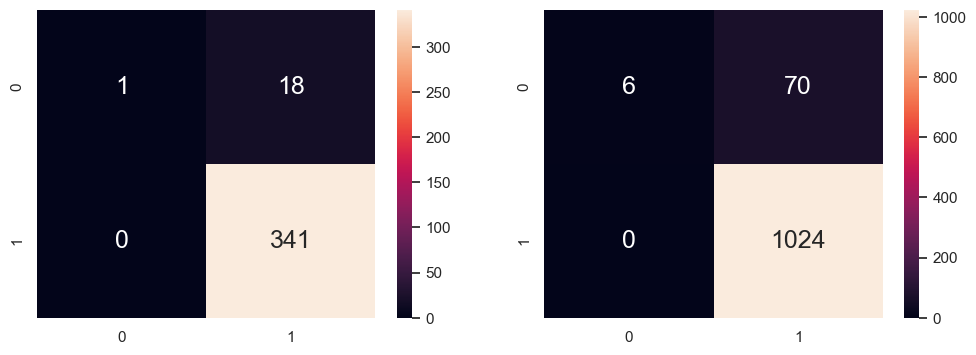

In [23]:
houseCentralAir = pd.DataFrame(houseData['CentralAir'])
houseTotal = pd.DataFrame(houseData[['GrLivArea','LotArea','TotalBsmtSF']])

# Split the dataset into Train and Test       
#y_train = pd.DataFrame(houseCentralAir[:1100])
#y_test  = pd.DataFrame(houseCentralAir[-360:])
#X_train = pd.DataFrame(houseTotalBsmtSF[:1100])
#X_test  = pd.DataFrame(houseTotalBsmtSF[-360:])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseTotal, houseCentralAir, test_size = 360/1460)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)


from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

f, axes = plt.subplots(1, 2, figsize = (12, 4))

# Predict CentralAir corresponding to TotalBsmtSF Test
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

# Predict CentralAir corresponding to TotalBsmtSF Train
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])